<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [8]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


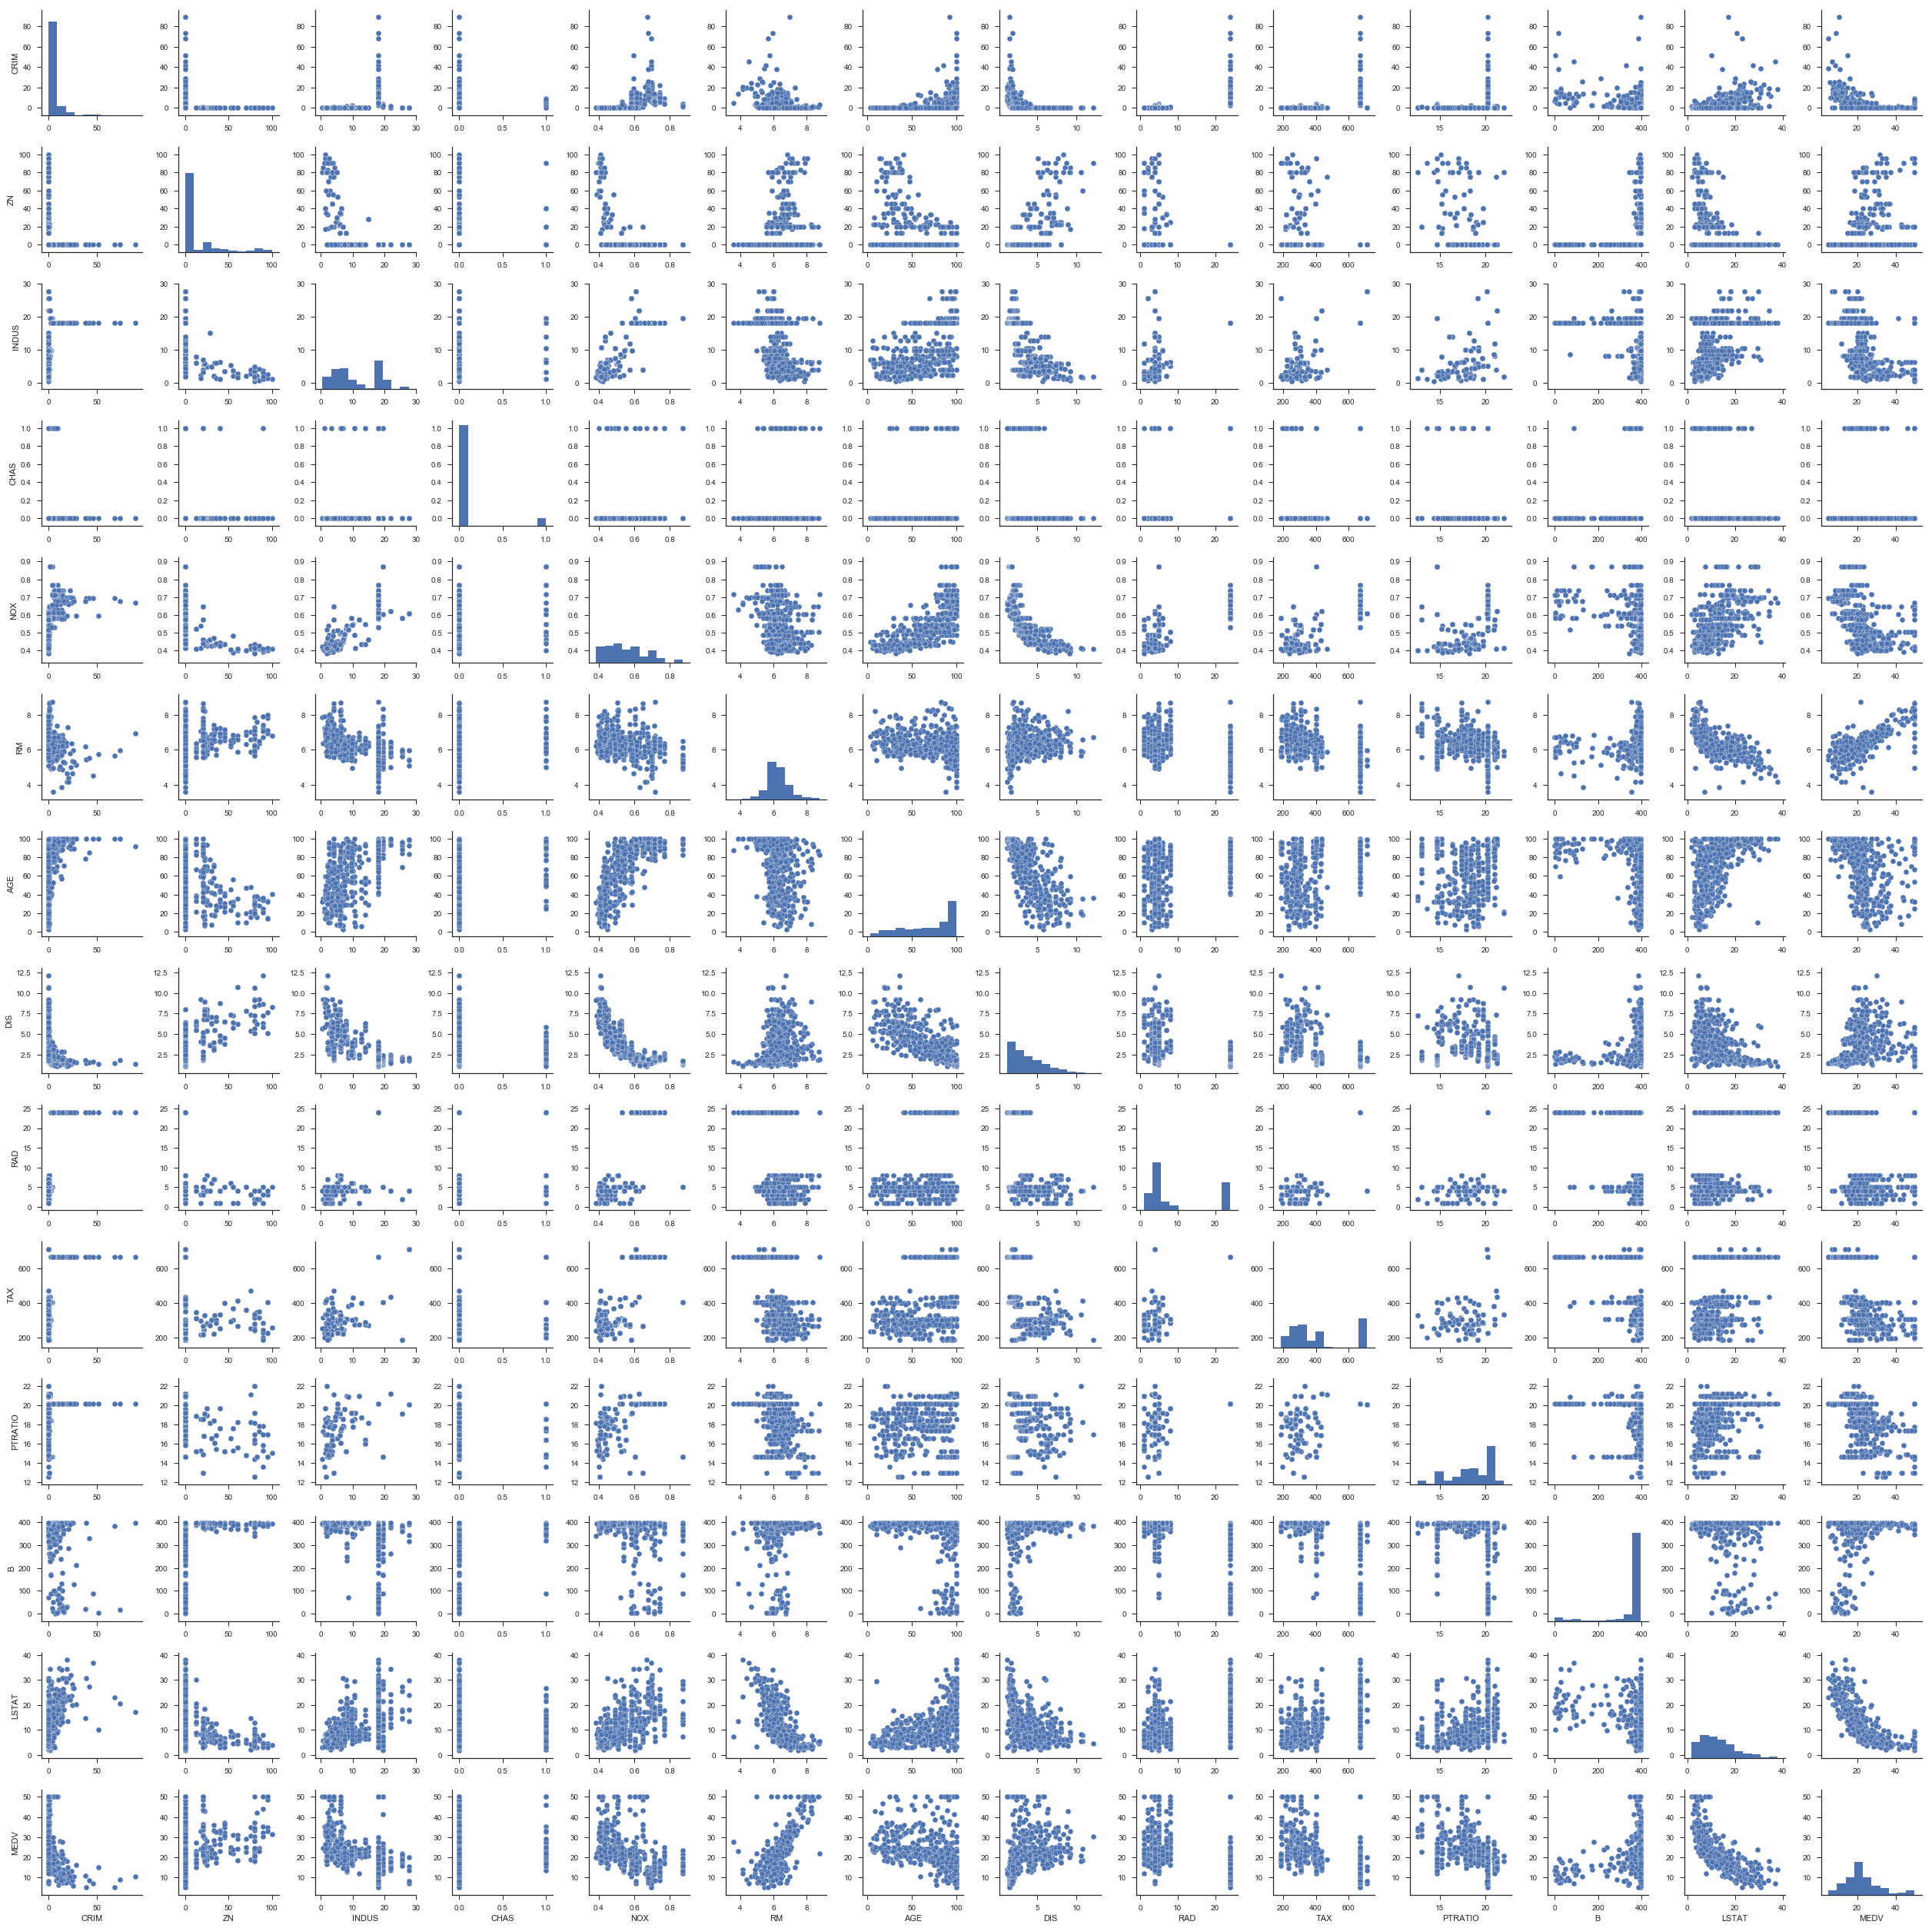

In [9]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [11]:
# Нормальное распределение: RM, MEDV
# Экспоненциальное распределение: DIS
# Распределение Бернулли: CHAS

Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [16]:
value = data['MEDV']
status = data['LSTAT']
value = np.array(value).reshape(-1,1)
status = np.array(status).reshape(-1,1)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    value,
    status,
    test_size = 0.2,
    random_state = 3
)

In [20]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
predicted_y = model.predict(X_test)

In [22]:
model.score(X_test, y_test)

0.5663680841829948

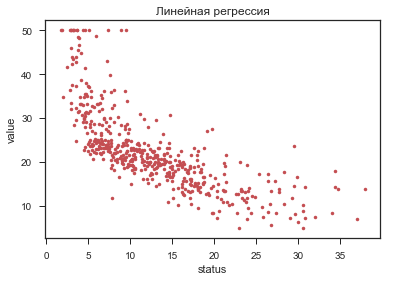

In [25]:
plt.xlabel('status')
plt.ylabel('value')
plt.title('Линейная регрессия')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(status, value, 'r.')
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [44]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head(20)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


In [30]:
X = data.iloc[:,1:]
X.head()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [31]:
np.cov(X)

array([[ 2.89788889e+02,  1.19766667e+02,  4.43333333e+01, ...,
         1.25133333e+02, -8.81777778e+01, -1.77644444e+02],
       [ 1.19766667e+02,  9.09000000e+01,  6.08888889e+01, ...,
        -2.90222222e+01, -1.20444444e+01,  6.42222222e+00],
       [ 4.43333333e+01,  6.08888889e+01,  6.28888889e+01, ...,
        -1.00000000e+01,  8.55555556e+00, -7.77777778e-01],
       ...,
       [ 1.25133333e+02, -2.90222222e+01, -1.00000000e+01, ...,
         1.47960000e+03,  2.94200000e+02, -3.28888889e+00],
       [-8.81777778e+01, -1.20444444e+01,  8.55555556e+00, ...,
         2.94200000e+02,  2.80622222e+02,  3.65533333e+02],
       [-1.77644444e+02,  6.42222222e+00, -7.77777778e-01, ...,
        -3.28888889e+00,  3.65533333e+02,  1.02448889e+03]])

In [33]:
np.round_(np.cov(X), decimals=1)

array([[ 2.8980e+02,  1.1980e+02,  4.4300e+01, ...,  1.2510e+02,
        -8.8200e+01, -1.7760e+02],
       [ 1.1980e+02,  9.0900e+01,  6.0900e+01, ..., -2.9000e+01,
        -1.2000e+01,  6.4000e+00],
       [ 4.4300e+01,  6.0900e+01,  6.2900e+01, ..., -1.0000e+01,
         8.6000e+00, -8.0000e-01],
       ...,
       [ 1.2510e+02, -2.9000e+01, -1.0000e+01, ...,  1.4796e+03,
         2.9420e+02, -3.3000e+00],
       [-8.8200e+01, -1.2000e+01,  8.6000e+00, ...,  2.9420e+02,
         2.8060e+02,  3.6550e+02],
       [-1.7760e+02,  6.4000e+00, -8.0000e-01, ..., -3.3000e+00,
         3.6550e+02,  1.0245e+03]])

In [34]:
print(np.shape(np.cov(X)))

(156, 156)


In [37]:
X.isnull().sum()

Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [40]:
data['Country (region)'].isnull().sum()

0

In [43]:
len(data['Country (region)'])

156

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

Сколько стран в выборке? Написать ответ. 

Добавить новую колонку в таблицу - 'continent'. Каждая страна относится к определенному материку. Всего материко 6:
*   Евразия,
*   Африка,
*   Северная Америка,
*   Южная Америка,
*   Австралия,
*   Антарктида.

Таким образом, мы можем классифицировать каждый элемент как член определенного класса - континента. 

Нарисовать sns.pairplot для класса - континет. Из графика сделать вывод о том, какие континеты похожи.

KeyError: 'continent'

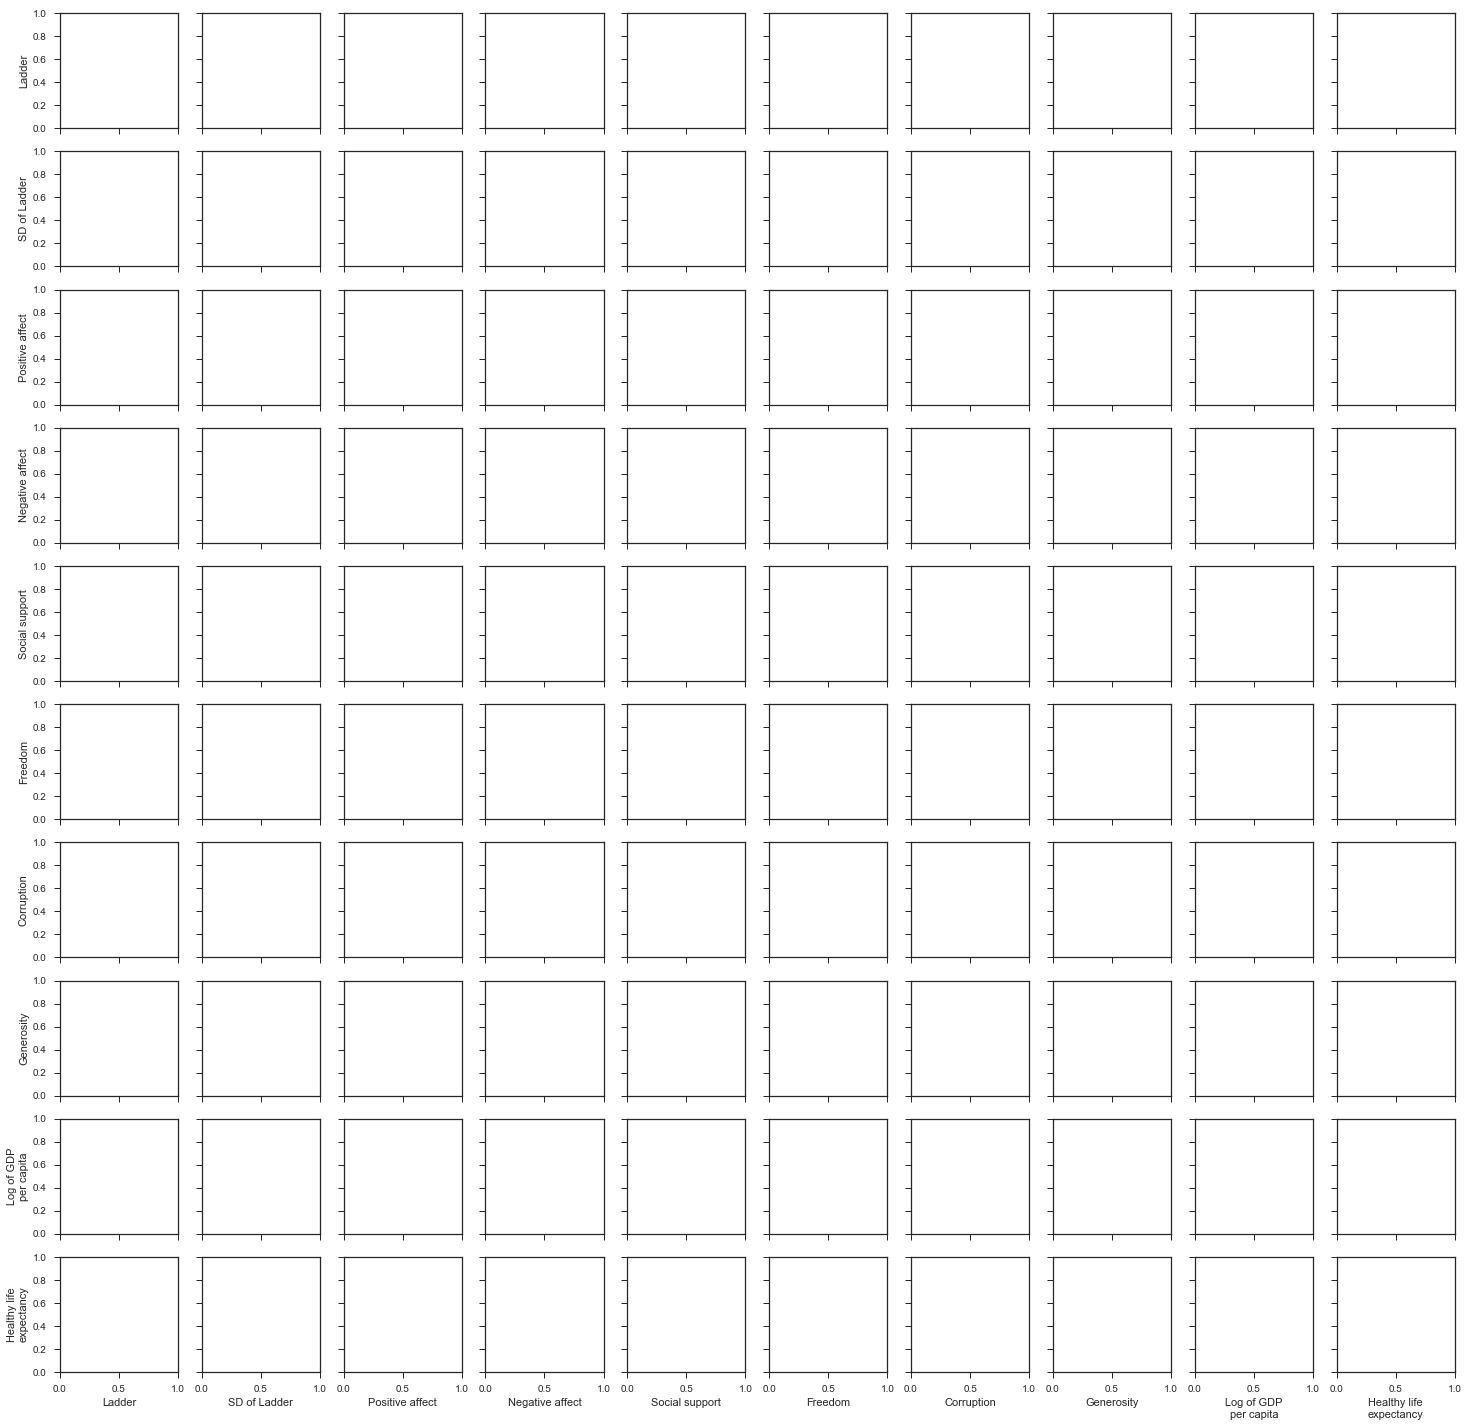

In [54]:
# пример кода на точечный график по континентам
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data, hue='continent')
plt.show()

Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? Сделать график регрессионной прямой на данных и собственных векторов. 

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


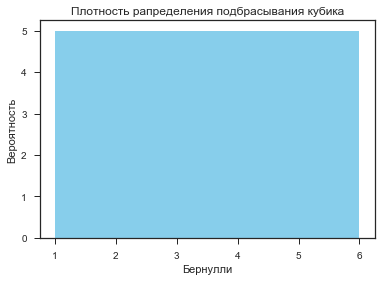

In [63]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 7, size=10)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()
heads = np.sum(coin_flips)

моделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

/Users/svetlana/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


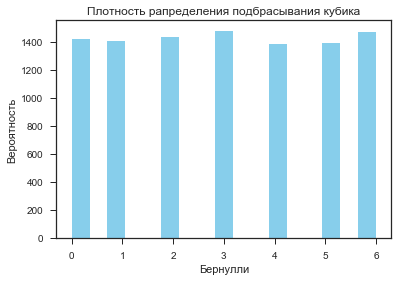

In [64]:
rng = np.random.RandomState(123)

coin_flips = rng.randint(0, 7, size=10000)
ax= sns.distplot(coin_flips,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Бернулли', ylabel='Вероятность')
plt.title('Плотность рапределения подбрасывания кубика')
plt.show()
heads = np.sum(coin_flips)